In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SelectKBest, mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
import numpy as np

In [2]:
df = pd.read_csv('Placement.csv')

In [3]:
#Remove Nulls

In [4]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,NaN,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,400000.0,Placed
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0,Placed
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0,Placed
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,204000.0,Placed


In [5]:
df.info()
#We have a few columns with nulls in them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           213 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           214 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  214 non-null    object 
 12  mba_p           215 non-null    float64
 13  salary          148 non-null    float64
 14  status          215 non-null    object 
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
#After trying several painstaking methods to deal with Salary, from creating different data frames with
#salary outliers removed but nulls redefined to -1 and just not those -1 rows in graphing,
#I've made the decision Salary is not even a good variable for my data. Since salary is a variable that occurs
#with placement, its not exactly a good predictor. Replacing nulls with medians created false correlations with salary
#Even if it had a good fit, I don't think it would be used for regression. 
#The fact it has so many nulls (even though its just unplaced people)cements im just going to drop it
df.drop('salary', axis=1, inplace=True)

In [7]:
#hsc_p only has a few nulls, so will fill them in with the median
med = df['hsc_p'].median()
df['hsc_p'].fillna(med, inplace=True)

In [8]:
#This colmun has no numierc values, and only one null so im going to drop it
df.dropna(subset=['specialisation'], inplace=True)

In [9]:
#This colmun also has no numierc values, and only one null so im going to drop it
df.dropna(subset=['hsc_s'], inplace=True)

In [10]:
#This is just a serial number so its useless to me
df.drop('sl_no', axis=1, inplace=True)

In [11]:
#Still 213 rows, plenty of data to work with
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          213 non-null    object 
 1   ssc_p           213 non-null    float64
 2   ssc_b           213 non-null    object 
 3   hsc_p           213 non-null    float64
 4   hsc_b           213 non-null    object 
 5   hsc_s           213 non-null    object 
 6   degree_p        213 non-null    float64
 7   degree_t        213 non-null    object 
 8   workex          213 non-null    object 
 9   etest_p         213 non-null    float64
 10  specialisation  213 non-null    object 
 11  mba_p           213 non-null    float64
 12  status          213 non-null    object 
dtypes: float64(5), object(8)
memory usage: 23.3+ KB


In [12]:
#Remove Outliers

In [13]:
#Columns that need to be looked at are numeric
#Im going to use the method of creating a new data frame for each outlier removal sequence

In [14]:
#ssc_p for those that performed very poorly in secondary school or the very top of thier class
Q1 = df['ssc_p'].quantile(0.25)
Q3 = df['ssc_p'].quantile(0.75)
IQRage = Q3 - Q1
print(IQRage)
below = Q1 - 1.5 * IQRage
above = Q3 + 1.5 * IQRage 

15.200000000000003


In [15]:
df_no_out1 = df.loc[(df['ssc_p'] >= below) & (df['ssc_p'] <= above)]

In [16]:
#hsc_p for those that performed very poorly in highschool or the very top of thier class
Q1 = df['hsc_p'].quantile(0.25)
Q3 = df['hsc_p'].quantile(0.75)
IQRage = Q3 - Q1
below = Q1 - 1.5 * IQRage
above = Q3 + 1.5 * IQRage 

In [17]:
df_no_out2 = df_no_out1.loc[(df_no_out1['hsc_p'] >= below) & (df_no_out1['hsc_p'] <= above)]

In [18]:
#Looks like alot of our outliers were in hsc_p, I'll make note of that but I want to avoid using outliers if I can
df_no_out2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          204 non-null    object 
 1   ssc_p           204 non-null    float64
 2   ssc_b           204 non-null    object 
 3   hsc_p           204 non-null    float64
 4   hsc_b           204 non-null    object 
 5   hsc_s           204 non-null    object 
 6   degree_p        204 non-null    float64
 7   degree_t        204 non-null    object 
 8   workex          204 non-null    object 
 9   etest_p         204 non-null    float64
 10  specialisation  204 non-null    object 
 11  mba_p           204 non-null    float64
 12  status          204 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.3+ KB


In [19]:
#degree_p for those who performed veyr poorly or the very top of their degree
Q1 = df['degree_p'].quantile(0.25)
Q3 = df['degree_p'].quantile(0.75)
IQRage = Q3 - Q1
below = Q1 - 1.5 * IQRage
above = Q3 + 1.5 * IQRage 

In [20]:
df_no_out3 = df_no_out2.loc[(df_no_out2['degree_p'] >= below) & (df_no_out2['degree_p'] <= above)]

In [21]:
#lets see how the data looks after removing some more outliers
df_no_out3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          203 non-null    object 
 1   ssc_p           203 non-null    float64
 2   ssc_b           203 non-null    object 
 3   hsc_p           203 non-null    float64
 4   hsc_b           203 non-null    object 
 5   hsc_s           203 non-null    object 
 6   degree_p        203 non-null    float64
 7   degree_t        203 non-null    object 
 8   workex          203 non-null    object 
 9   etest_p         203 non-null    float64
 10  specialisation  203 non-null    object 
 11  mba_p           203 non-null    float64
 12  status          203 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.2+ KB


In [22]:
#etest_p for those who did poorly on the employeement test or were the very top performers
Q1 = df['etest_p'].quantile(0.25)
Q3 = df['etest_p'].quantile(0.75)
IQRage = Q3 - Q1
below = Q1 - 1.5 * IQRage
above = Q3 + 1.5 * IQRage 

In [23]:
df_no_out4 = df_no_out3.loc[(df_no_out3['etest_p'] >= below) & (df_no_out3['etest_p'] <= above)]

In [24]:
#mba_p for those who recently performed very poorly in school recently, 
#or were the very top of the class 
Q1 = df['mba_p'].quantile(0.25)
Q3 = df['mba_p'].quantile(0.75)
IQRage = Q3 - Q1
below = Q1 - 1.5 * IQRage
above = Q3 + 1.5 * IQRage 

In [25]:
df_no_out5 = df_no_out4.loc[(df_no_out4['mba_p'] >= below) & (df_no_out4['mba_p'] <= above)]

In [26]:
df_no_out5.info()
#Still plenty of data, I'm happy with how the process turned out. I'll now assign the 
#original df to df_no_out5 since I like the amount of data and
#personally, if one grauduate has a single data point that is an outlier, I'd like to avoid using them altogether

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          203 non-null    object 
 1   ssc_p           203 non-null    float64
 2   ssc_b           203 non-null    object 
 3   hsc_p           203 non-null    float64
 4   hsc_b           203 non-null    object 
 5   hsc_s           203 non-null    object 
 6   degree_p        203 non-null    float64
 7   degree_t        203 non-null    object 
 8   workex          203 non-null    object 
 9   etest_p         203 non-null    float64
 10  specialisation  203 non-null    object 
 11  mba_p           203 non-null    float64
 12  status          203 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.2+ KB


In [27]:
df = df_no_out5

In [28]:
df.info()
#great, it worked

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          203 non-null    object 
 1   ssc_p           203 non-null    float64
 2   ssc_b           203 non-null    object 
 3   hsc_p           203 non-null    float64
 4   hsc_b           203 non-null    object 
 5   hsc_s           203 non-null    object 
 6   degree_p        203 non-null    float64
 7   degree_t        203 non-null    object 
 8   workex          203 non-null    object 
 9   etest_p         203 non-null    float64
 10  specialisation  203 non-null    object 
 11  mba_p           203 non-null    float64
 12  status          203 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.2+ KB


In [29]:
#I wanna make some visulizations to show to my boss

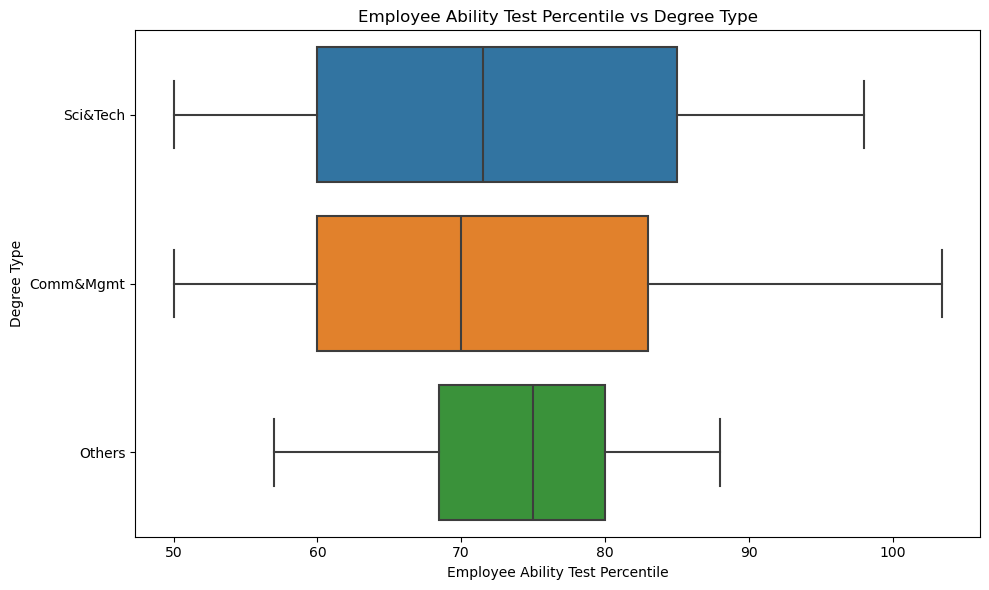

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='etest_p', y='degree_t')
plt.title('Employee Ability Test Percentile vs Degree Type')
plt.xlabel('Employee Ability Test Percentile')
plt.ylabel('Degree Type')
plt.tight_layout()
plt.show()
#This gives us some insight on how our gradutes score in being a good eomplyee based off thier degree type. 
#It appears all degree types have a high median(in my opionion above 65 employee test score. However, both
#sci and tech and comm and Mgmt have some high variability. If the company values this employee ability test,
#they should know that those with 'Others'degree type classification score the highest most consistenly.
#It should be noted both Sci and Tech/Comm and Mgmt don't have a score below 50 and should score well on the test a lareg poriton of the time.

Text(40, 80, 'Correlation: 0.52')

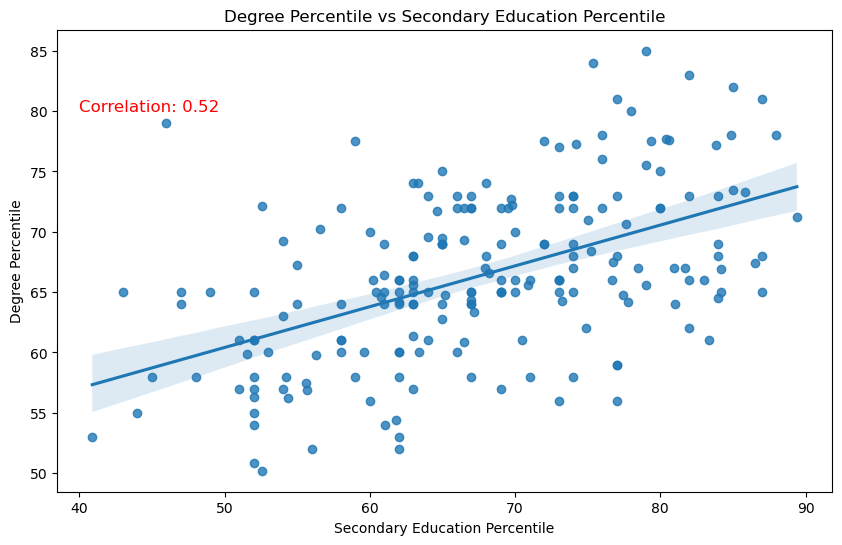

In [31]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='ssc_p', y='degree_p')
plt.title('Degree Percentile vs Secondary Education Percentile')
plt.xlabel('Secondary Education Percentile')
plt.ylabel('Degree Percentile')
correlation_coefficient = df['ssc_p'].corr(df['degree_p'])
plt.text(40, 80, f'Correlation: {correlation_coefficient:.2f}', fontsize=12, color='red')
#Great,I can see some moderate positive correlation between these two varibles of 0.52. It looks like how well
#a gradute did in highschool is a good predictor of how well they will do in school within thier degree program.
#If the company values degree program percentile, then secondary schooling percentile is a good indictaor of perforance.

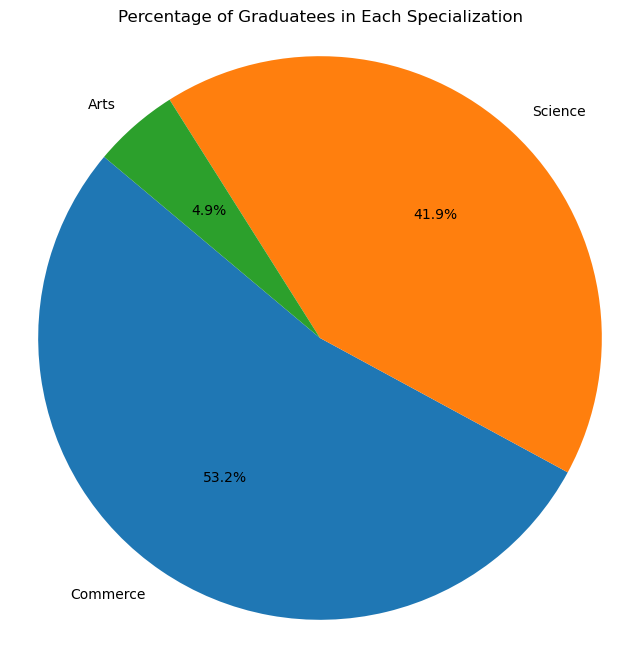

In [32]:
specialization_percentage = (df['hsc_s'].value_counts() / len(df)) * 100
plt.figure(figsize=(8, 8))
plt.pie(specialization_percentage, labels=specialization_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Graduatees in Each Specialization')
plt.axis('equal')  
plt.show()
#Here we can get an idea of how many gradutes are in each Specialization by percent of total gradutes. 
#It looks like most of our gradutes are commerce by a large portion of over 10% on the next largest Science.
#It should be noted we have very little Arts, and our data most likely won't be good at prediciting someones status
#based off them just being an Arts Specialization.

In [33]:
df_2 = df.copy()

In [34]:
#Lets make a bin to organize the large amount of degree percentile scores (none are below 50)
df_2['degree_p_bin'] = pd.cut(df_2['degree_p'], bins = [50,60,70,80,90,100], labels=['50-60','60-70','70-80','80-90','90-100'])

/var/folders/mv/ngt34s_51wj5dl5f7kcmt6pw0000gn/T/ipykernel_67626/2240929604.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_2.groupby(['degree_p_bin', 'degree_t']).size().reset_index(name='count')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observe

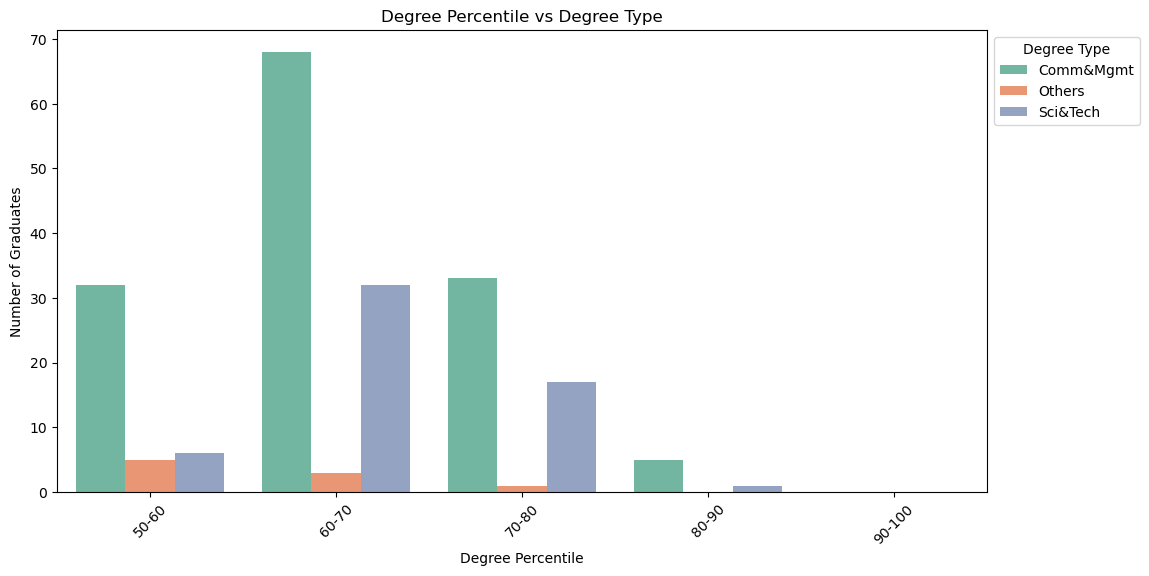

In [35]:
#Lets group the data I'm interested in to use with my bin
grouped = df_2.groupby(['degree_p_bin', 'degree_t']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='degree_p_bin', y='count', hue='degree_t', palette='Set2')
plt.title('Degree Percentile vs Degree Type')
plt.xlabel('Degree Percentile')
plt.ylabel('Number of Graduates')
plt.xticks(rotation=45)
plt.legend(title='Degree Type', bbox_to_anchor=(1.00, 1), loc='upper left')
plt.show()
#Looks like all of our graduates were at least the top 50 percentile in thier degree program. There is some overlap
#with hsc_s (specialization)that we have much more comms and Mgmt Graduates then Sci and Tech and 'Others'(most likely pretaining to Arts).
#After binning the degree percentile, we see that most graduates in Sci and Tech and Comm and Mgmt fall into the 60-70 range.
#Since there is little variability, If we determine degree percentile to be a good indicator of placement, 
#its possible there could be a stark difference between just 50-60 and 60-70, and 60-70 and 70-80 on gradute placement rates in those groups.

In [36]:
#Now that we have an idea of who our gradutes our and some exisiting trends, 
#lets see what may best predict placement in the next set of graphs

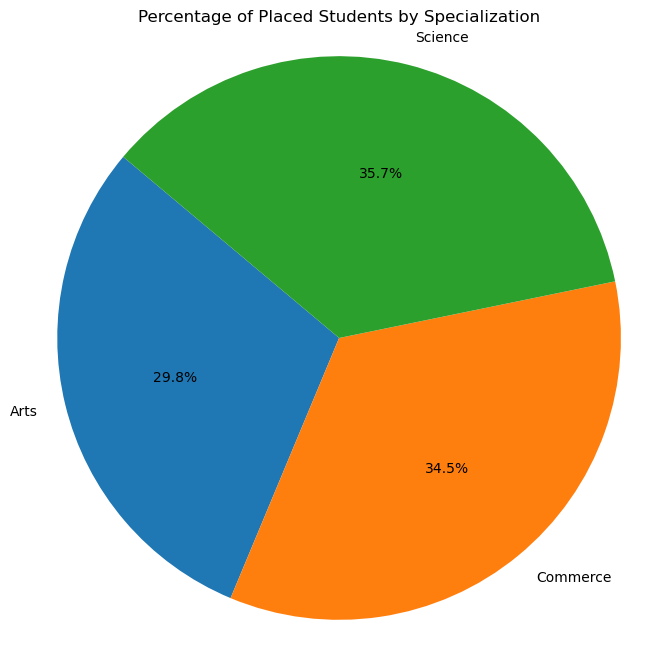

In [37]:
specialization_count = df['hsc_s'].value_counts()
#lets group the gradutes by placed only to get a better idea of how each specialization did in placement
specialization_placement_count = df[df['status'] == 'Placed'].groupby('hsc_s').size()
percentage_placed_by_specialization = (specialization_placement_count / specialization_count) * 100
plt.figure(figsize=(8, 8))
plt.pie(percentage_placed_by_specialization, labels=percentage_placed_by_specialization.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Placed Students by Specialization')
plt.axis('equal')  
plt.show()
#Interesting. It looks like even though 53% of our gradutes are in Commerce, only 34.5% found placement. 
#Yet, of our 42% Science gradutes, 35.7% were placed! This shows me two important points:
#Commerce graduates may struggle to find placement (perhaps competitve field), and Science
#gradutes have a high placement rate (they may be in demand right now) so being in Science can be a good indicator of placement.
#Since I know only 5% of our gradutes are in the Arts, I don't think we can gather much information.

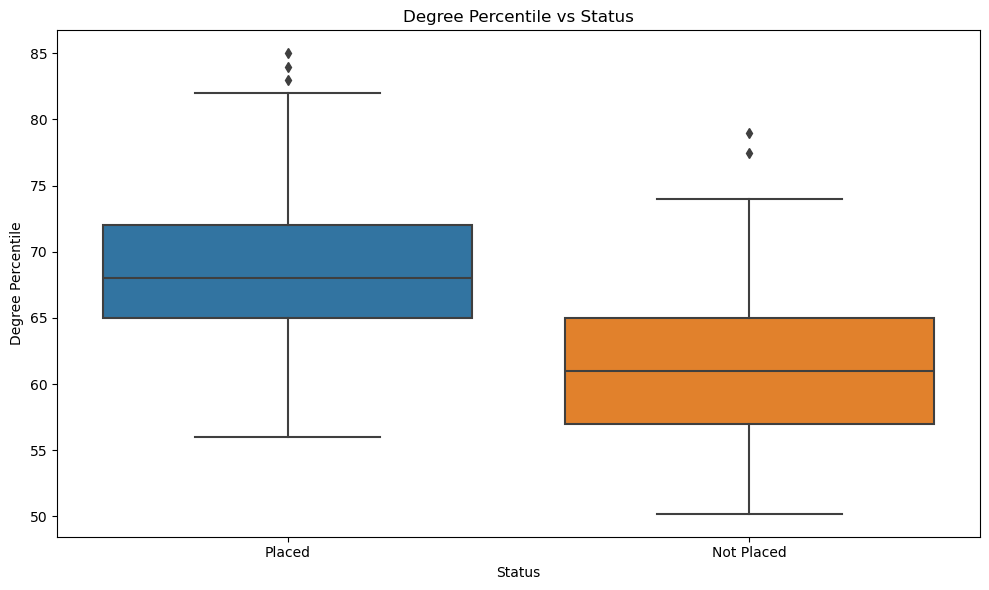

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='status', y='degree_p')
plt.title('Degree Percentile vs Status')
plt.xlabel('Status')
plt.ylabel('Degree Percentile')
plt.tight_layout()
plt.show()
#Looks like Degree percentile is a fantastic indicator of a gradute being placed! 
#Also, it seems our previous interpretation of our graph looking at degree percentile is backed up by our box plot.
#Only 10-15 difference in degree percentile saw a huge difference in placement of our graduates.
#A few take aways: those placed had a median percentile nearly 15 higher than those Not placed. 
#The IQR are also extremely small for both placed and not placed, indicting this data has very low variability.
#It should be noted there were a few outliers on both sides excluded from the inner boxplot.
#Looks like those who score well in thier degree program, at least 65 percentile, have a stronger chance of being placed.

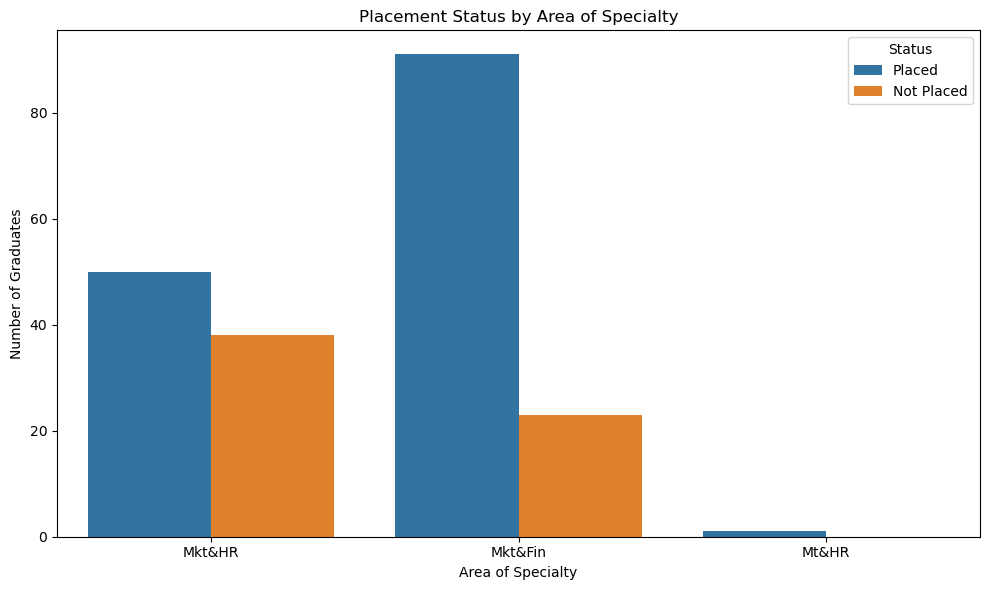

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='specialisation', hue='status')
plt.title('Placement Status by Area of Specialty')
plt.xlabel('Area of Specialty')
plt.ylabel('Number of Graduates')
plt.legend(title='Status')
plt.tight_layout()
plt.show()
#This graph shows me gradutes who have an area of specialty in Mkt and Fin have a very high placement rate compared to 
#Mkt and HR, even thought both are a substaintial amount of the data. 
#There is not enough MT and HR to make any conclusions. Perhaps this was misenterted information? I'll check with the company
#Looks like gradutes who go into the Mkt and Fin have a good chance of being placed

In [40]:
#Prepare for regression, lets find which varibles we should focus on using SelectKBest

In [41]:
df['gender'] = df['gender'].factorize()[0]
df['ssc_b'] = df['ssc_b'].factorize()[0]
df['hsc_b'] = df['hsc_b'].factorize()[0]
df['hsc_s'] = df['hsc_s'].factorize()[0]
df['degree_t'] = df['degree_t'].factorize()[0]
df['workex'] = df['workex'].factorize()[0]
df['specialisation'] = df['specialisation'].factorize()[0]
df['status'] = df['status'].factorize()[0]

In [42]:
X = df.drop('status',axis=1)
y = df['status']

In [43]:
selector = SelectKBest(score_func=f_regression, k=3)
selector.fit(X, y)

SelectKBest(k=3, score_func=<function f_regression at 0x147947420>)

In [44]:
selected_features_indices = selector.get_support()
selected_features_names = X.columns[selected_features_indices]
print(selected_features_names)

Index(['ssc_p', 'hsc_p', 'degree_p'], dtype='object')


In [45]:
#Instead of dropping status from X and testing it against everything, lets run the regression on the factors best fit
#for it. Thanks SelectKBest
#Lets test ssc_p, hsc_p, and degree_p against status

In [46]:
#Checking for balance since original results made no sense

In [47]:
df['status'].value_counts()
#yea thats needs some balacing 

status
0    142
1     61
Name: count, dtype: int64

In [48]:
#START OF BALACNING
df_unbal = pd.read_csv('Placement.csv')

In [49]:
#get rid of nulls/outliers so it can run properly and we can later add predicted outcome to df,
#so df_unbal has the same index

In [50]:
#same exact code above instead df is df_unbal
df_unbal.drop('salary', axis=1, inplace=True)
df_unbal.drop('sl_no', axis=1,inplace=True)
med = df_unbal['hsc_p'].median()
df_unbal['hsc_p'].fillna(med, inplace=True)
df_unbal.dropna(subset=['specialisation'], inplace=True)
df_unbal.dropna(subset=['hsc_s'], inplace=True)

Q1 = df_unbal['ssc_p'].quantile(0.25)
Q3 = df_unbal['ssc_p'].quantile(0.75)
IQRage = Q3 - Q1
print(IQRage)
below = Q1 - 1.5 * IQRage
above = Q3 + 1.5 * IQRage 
df_unbal = df_unbal.loc[(df_unbal['ssc_p'] >= below) & (df_unbal['ssc_p'] <= above)]

Q1 = df_unbal['hsc_p'].quantile(0.25)
Q3 = df_unbal['hsc_p'].quantile(0.75)
IQRage = Q3 - Q1
below = Q1 - 1.5 * IQRage
above = Q3 + 1.5 * IQRage
df_unbal = df_unbal.loc[(df_unbal['hsc_p'] >= below) & (df_unbal['hsc_p'] <= above)]

Q1 = df_unbal['degree_p'].quantile(0.25)
Q3 = df_unbal['degree_p'].quantile(0.75)
IQRage = Q3 - Q1
below = Q1 - 1.5 * IQRage
above = Q3 + 1.5 * IQRage
df_unbal = df_unbal.loc[(df_unbal['degree_p'] >= below) & (df_unbal['degree_p'] <= above)]

Q1 = df_unbal['etest_p'].quantile(0.25)
Q3 = df_unbal['etest_p'].quantile(0.75)
IQRage = Q3 - Q1
below = Q1 - 1.5 * IQRage
above = Q3 + 1.5 * IQRage 
df_unbal = df_unbal.loc[(df_unbal['etest_p'] >= below) & (df_unbal['etest_p'] <= above)]

Q1 = df_unbal['mba_p'].quantile(0.25)
Q3 = df_unbal['mba_p'].quantile(0.75)
IQRage = Q3 - Q1
below = Q1 - 1.5 * IQRage
above = Q3 + 1.5 * IQRage 
df_unbal = df_unbal.loc[(df_unbal['mba_p'] >= below) & (df_unbal['mba_p'] <= above)]
df_unbal.info()

15.200000000000003
<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          203 non-null    object 
 1   ssc_p           203 non-null    float64
 2   ssc_b           203 non-null    object 
 3   hsc_p           203 non-null    float64
 4   hsc_b           203 non-null    object 
 5   hsc_s           203 non-null    object 
 6   degree_p        203 non-null    float64
 7   degree_t        203 non-null    object 
 8   workex          203 non-null    object 
 9   etest_p         203 non-null    float64
 10  specialisation  203 non-null    object 
 11  mba_p           203 non-null    float64
 12  status          203 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.2+ KB


In [51]:
df_unbal['gender'] = df_unbal['gender'].factorize()[0]
df_unbal['ssc_b'] = df_unbal['ssc_b'].factorize()[0]
df_unbal['hsc_b'] = df_unbal['hsc_b'].factorize()[0]
df_unbal['hsc_s'] = df_unbal['hsc_s'].factorize()[0]
df_unbal['degree_t'] = df_unbal['degree_t'].factorize()[0]
df_unbal['workex'] = df_unbal['workex'].factorize()[0]
df_unbal['specialisation'] = df_unbal['specialisation'].factorize()[0]
df_unbal['status'] = df_unbal['status'].factorize()[0]

In [52]:
df_unbal['status'].value_counts()/len(df_unbal)*100

status
0    69.950739
1    30.049261
Name: count, dtype: float64

In [53]:
X = df_unbal

In [54]:
X.head(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,0,58.00,0,0,55.0,0,58.80,0
1,0,79.33,1,78.33,0,1,77.48,0,1,86.5,1,66.28,0
2,0,65.00,1,68.00,1,2,64.00,1,0,75.0,1,57.80,0
3,0,56.00,1,52.00,1,1,52.00,0,0,66.0,0,59.43,1
4,0,85.80,1,73.60,1,0,73.30,1,0,96.8,1,55.50,0


In [55]:
#Lets see how well these three variables can predict placement status in the future
X = df_unbal[['ssc_p', 'hsc_p','degree_p']]
y = df_unbal['status']

In [56]:
lr = LogisticRegression()

In [57]:
lr.fit(X,y)

LogisticRegression()

In [58]:
lr.score(X,y)

0.8325123152709359

In [59]:
pred = lr.predict(X)

In [60]:
balanced_accuracy_score(y, pred)
#still very strong

0.7680674209189564

In [61]:
xtest = [67.00,91.00,58.00]
xtest = np.array(xtest).reshape(1, -1)
xtest.shape

(1, 3)

In [62]:
lr.predict(xtest)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [63]:
xtest= [79.33,78.33, 77.48]
xtest = np.array(xtest).reshape(1, -1)
xtest.shape


(1, 3)

In [64]:
test = lr.predict(X)

In [65]:
print(metrics.confusion_matrix(y,test))

[[132  10]
 [ 24  37]]


In [66]:
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y,test),  
    index=['actual:yes', 'actual:no'], 
    columns=['pred:yes', 'pred:no']
)
print(cmtx)
#Nice, 169 correct predications to 34 incorrect. Thats very reliable.

            pred:yes  pred:no
actual:yes       132       10
actual:no         24       37


In [67]:
#lets add our predicted outcome of status to the dataframe
df['predicated outcome'] = test

In [68]:
df_unbal['predicated outcome']= test

In [69]:
df.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,predicated outcome
0,0,67.00,0,91.00,0,0,58.00,0,0,55.00,0,58.80,0,0
1,0,79.33,1,78.33,0,1,77.48,0,1,86.50,1,66.28,0,0
2,0,65.00,1,68.00,1,2,64.00,1,0,75.00,1,57.80,0,0
3,0,56.00,1,52.00,1,1,52.00,0,0,66.00,0,59.43,1,1
4,0,85.80,1,73.60,1,0,73.30,1,0,96.80,1,55.50,0,0
5,0,55.00,0,49.80,0,1,67.25,0,1,55.00,1,51.58,1,1
6,1,46.00,0,49.20,0,0,79.00,1,0,74.28,1,53.29,1,1
7,0,82.00,1,64.00,1,1,66.00,0,1,67.00,1,62.14,0,0
8,0,73.00,1,79.00,1,0,72.00,1,0,91.34,1,61.29,0,0
9,0,58.00,1,70.00,1,0,61.00,1,0,54.00,1,52.21,1,1


In [70]:
#Testing time

In [71]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=.3, random_state=36363)

In [72]:
X_train.shape

(142, 3)

In [73]:
y_train.shape

(142,)

In [74]:
X_test.shape

(61, 3)

In [75]:
lr.fit(X_train,y_train)

LogisticRegression()

In [76]:
lr.score(X_train,y_train)
#Looks like our model is indeed very strong

0.8380281690140845

In [77]:
train = lr.predict(X_train)

In [78]:
test = lr.predict(X_test)

In [79]:
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y_test,test),  
    index=['actual:yes', 'actual:no'], 
    columns=['pred:yes', 'pred:no']
)
print(cmtx)
#Great, 46 correct predictions and only 15 incorrect predictions. This model is very strong, yet believeable
#at predicting whether a graduate would find placement or not.

            pred:yes  pred:no
actual:yes        37        6
actual:no          9        9


In [80]:
#Overall,it looks like secondary education percentile, secondary higher education percentile, and degree percentile make for a very accurate regression model
#if a gradute is going to find placement or not. I'll let the company know in the future they should keep an eye on these
#attributes in future gradutes to determine who will better find placement. The more I think about it,
#the more it makes sense, as your highschool grades are very important for getting into a good college,
#which makes finding a job all the more easy. This was a very challenging but rewarding project ngl.